<p align="center"><img  src="https://www.visioterra.fr/web/IMG/siteon0.png?1638355907"></p>

<h1 align="center">VtWeb framework / Analysis API : NDVI in crop field</h1>
<h2> Jupyter Notebook code example </h2>

This notebook will provide code example of the use of the VtWeb framework <strong>Analysis API</strong>. <br/>
Feel free to use it as you desire.

## Table of contents:
0. [Use Case](#Use-Case)<br/>

1. [Retrieve NDVI values](#Retrieve-NDVI-values)<br/>
    1.1 [Single date](#Single-date)<br/>
    1.2 [Time series](#Time-series)<br/>
    
2. [Plotting values](#Plotting-values)<br/>

<h1 align="center">Use Case</h1><br/>
This notebook intent to retrieve and illustrate the evolution of the NDVI value inside a specified crop field.<br/>
We will submit a predefined polygon to the Analysis API for several Sentinel-2 acquisitions and plot the results<br/>

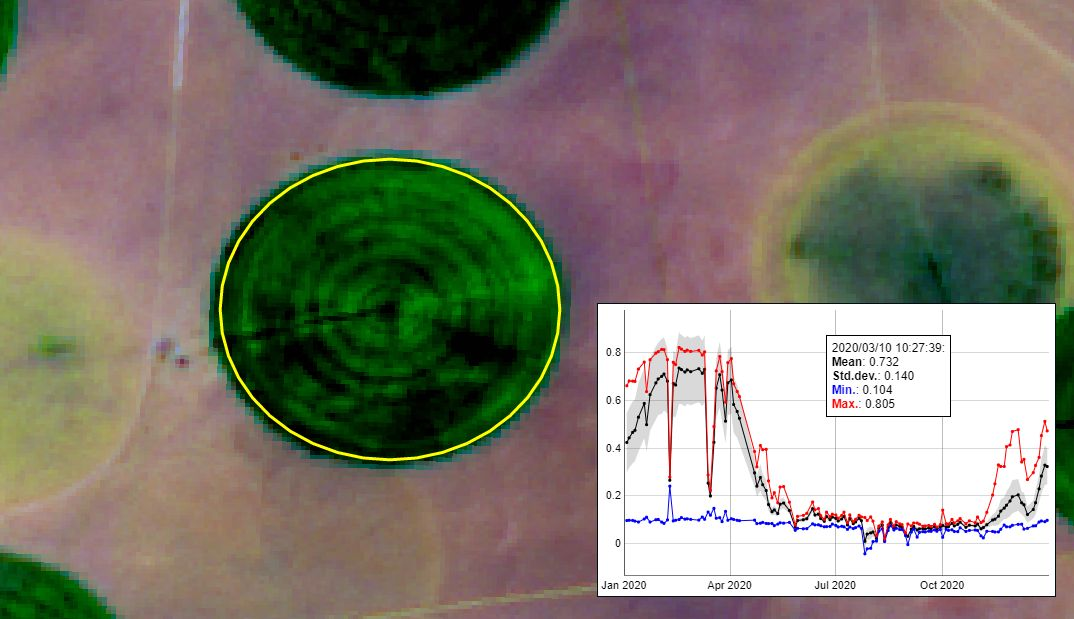

<h1 align="center">Retrieve NDVI values</h1>
<h2>Single date</h2><br/>
Here we will perform a request for one Sentinel-2 acquisition. We need to import the requests library. 

In [56]:
import requests
import json

First, we will defined the polygon corresponding to our <b>crop field</b> using the GeoJSON syntax. The one used here is a circular field located in Algeria. 

In [57]:
crop_field = {"type":"Polygon", "coordinates":[[[-0.10397589951754,28.280093103183],[-0.10338775704358,28.28005212585],[-0.10281409791213,28.27993020294],[-0.10226904870835,28.279730336865],[-0.10176603129989,28.279457449402],[-0.10131743225301,28.279118260467],[-0.10093429779197,28.278721122583],[-0.10062606173513,28.278275815194],[-0.1004003132075,28.277793303785],[-0.10026261003555,28.277285469761],[-0.10021634169689,28.276764817962],[-0.10026264614868,28.276244168655],[-0.10040038189876,28.275736341863],[-0.10062615628046,28.275253841718],[-0.10093440893683,28.274808548524],[-0.10131754911756,28.274411426374],[-0.10176614244469,28.274072253173],[-0.10226914325376,28.273799379905],[-0.10281416660339,28.273599525094],[-0.10338779315672,28.273477609416],[-0.10397589951754,28.273436634575],[-0.10456400587836,28.273477609416],[-0.10513763243169,28.273599525094],[-0.10568265578131,28.273799379905],[-0.10618565659039,28.274072253173],[-0.10663424991752,28.274411426374],[-0.10701739009825,28.274808548524],[-0.10732564275462,28.275253841718],[-0.10755141713632,28.275736341863],[-0.10768915288639,28.276244168655],[-0.10773545733819,28.276764817962],[-0.10768918899953,28.277285469761],[-0.10755148582758,28.277793303785],[-0.10732573729995,28.278275815194],[-0.10701750124311,28.278721122583],[-0.10663436678207,28.279118260467],[-0.10618576773518,28.279457449402],[-0.10568275032673,28.279730336865],[-0.10513770112295,28.27993020294],[-0.10456404199149,28.28005212585],[-0.10397589951754,28.280093103183]]]}

Then, we define a function that build the URL to the Analysis API.

In [58]:
base_url = "https://visioterra.org/VtWeb/servlet/consumer/stats?"

def build_analysis_api_url(module_id, dataset_id, granule_id, style):
    request_url = base_url + \
        "moduleId=" + module_id + "&" + \
        "datasetId=" + dataset_id + "&" + \
        "granuleId=" + granule_id + "&" + \
        "style=" + style
    
    return request_url

Now, we may submit a request for a specific Sentinel-2 acquisition (here the 18/01/2020).

In [59]:
module_id = "VtSentinelMsi"
dataset_id = "Sentinel2A/MSI"
granule_id = "S2A_MSIL1C_20200118T104351_N0208_R008_T30RYS_20200118T111310"
style = "ndvi(QT_B08,QT_B04)"

url = build_analysis_api_url(module_id, dataset_id, granule_id, style)

r = requests.post(url, data=json.dumps(crop_field))

print(r.text)

{"minimum":0.09947506338357925,"average":0.5839544834820581,"stddev":0.1508981300111572,"maximum":0.7798165082931519,"pixelCount":5392,"backgroundCount":125680}


Here we can see that the average NDVI value is about <b>0.58</b> with a standard deviation of <b>0.15</b>.

<h2>Time series</h2>
Here we will perfom several requests to retrieve NDVI statistics from Sentinel-2 acquisitions along the 2020 year.<br/>
Here is defined in an array some Sentinel-2 <b><code>granuleId</code></b>.

In [60]:
granule_ids = [
    "S2A_MSIL1C_20200118T104351_N0208_R008_T30RYS_20200118T111310",
    "S2A_MSIL1C_20200217T104111_N0209_R008_T30RYS_20200217T112222",
    "S2A_MSIL1C_20200308T104021_N0209_R008_T30RYS_20200308T110353",
    "S2A_MSIL1C_20200325T103021_N0209_R108_T30RYS_20200325T155149",
    "S2A_MSIL1C_20200407T104021_N0209_R008_T30RYS_20200407T124402",
    "S2A_MSIL1C_20200424T103021_N0209_R108_T30RYS_20200424T124310",
    "S2A_MSIL1C_20200514T103031_N0209_R108_T30RYS_20200514T123548",
    "S2A_MSIL1C_20200616T104031_N0209_R008_T30RYS_20200616T124513",
    "S2A_MSIL1C_20200716T104031_N0209_R008_T30RYS_20200716T124510",
    "S2A_MSIL1C_20200815T104031_N0209_R008_T30RYS_20200815T125008",
    "S2A_MSIL1C_20200914T104031_N0209_R008_T30RYS_20200914T125645",
    "S2A_MSIL1C_20201014T104031_N0209_R008_T30RYS_20201014T125318",
    "S2A_MSIL1C_20201113T104311_N0209_R008_T30RYS_20201113T125344",
    "S2A_MSIL1C_20201213T104441_N0209_R008_T30RYS_20201213T125210"
]

For each <b><code>granuleId</code></b>, we extract the acquisition date and create an array to store the results.

In [61]:
results = []

for granule_id in granule_ids:
    year = granule_id[11:15]
    month = granule_id[15:17]
    day = granule_id[17:19]
    
    results.append({"date": year+"-"+month+"-"+day,"granuleId":granule_id})

Now, we will send the requests and store de results in the array.

In [62]:
for item in results:
    granule_id = item["granuleId"]
    
    url = build_analysis_api_url("VtSentinelMsi", "Sentinel2A/MSI", granule_id, "ndvi(QT_B08,QT_B04)")
    r = requests.post(url, data=json.dumps(crop_field))
    
    item['result'] = json.loads(r.text)
    print(granule_id + ": " + "{:.2f}".format(item['result']['average']))

print ("!!! done !!!")

S2A_MSIL1C_20200118T104351_N0208_R008_T30RYS_20200118T111310: 0.58
S2A_MSIL1C_20200217T104111_N0209_R008_T30RYS_20200217T112222: 0.73
S2A_MSIL1C_20200308T104021_N0209_R008_T30RYS_20200308T110353: 0.71
S2A_MSIL1C_20200325T103021_N0209_R108_T30RYS_20200325T155149: 0.64
S2A_MSIL1C_20200407T104021_N0209_R008_T30RYS_20200407T124402: 0.55
S2A_MSIL1C_20200424T103021_N0209_R108_T30RYS_20200424T124310: 0.24
S2A_MSIL1C_20200514T103031_N0209_R108_T30RYS_20200514T123548: 0.17
S2A_MSIL1C_20200616T104031_N0209_R008_T30RYS_20200616T124513: 0.13
S2A_MSIL1C_20200716T104031_N0209_R008_T30RYS_20200716T124510: 0.09
S2A_MSIL1C_20200815T104031_N0209_R008_T30RYS_20200815T125008: 0.07
S2A_MSIL1C_20200914T104031_N0209_R008_T30RYS_20200914T125645: 0.06
S2A_MSIL1C_20201014T104031_N0209_R008_T30RYS_20201014T125318: 0.08
S2A_MSIL1C_20201113T104311_N0209_R008_T30RYS_20201113T125344: 0.10
S2A_MSIL1C_20201213T104441_N0209_R008_T30RYS_20201213T125210: 0.12
!!! done !!!


<h1 align="center">Plotting values</h1><br/>
In the <b><code>results</code></b> array, we have the acquisition date and the analysis API result. Here we will plot the NDVI average, minimum and maximum values in a graph using matplotlib.

In [63]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

Here we plot both SRTMGL1 and Copernicus DEM elevations.

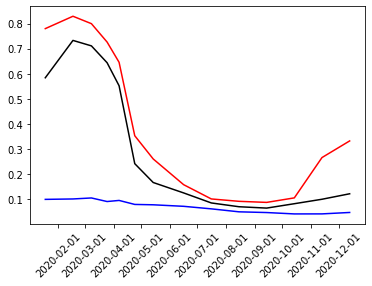

In [65]:
x_values = [dt.datetime.strptime(item['date'], "%Y-%m-%d").date() for item in results]
avg_values = [item['result']['average'] for item in results]
min_values = [item['result']['minimum'] for item in results]
max_values = [item['result']['maximum'] for item in results]

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.plot(x_values, avg_values, 'k')
plt.plot(x_values, min_values, 'b')
plt.plot(x_values, max_values, 'r')

plt.show()